In [2]:
#library
from sklearn import preprocessing
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt


In [12]:
#random database and split
data = datasets.load_diabetes()
df = pd.DataFrame(data['data'],columns = data['feature_names'])
df['target'] = data['target']
def sechange(x):
    if x>0:
        return 1
    else :
        return 0
df['sex'] = df.apply(lambda row: sechange(row['sex']), axis = 1)
train_size = 0.9 
train = df.sample(frac = train_size)
test = df.drop(train.index)

train_x = train.drop(columns='target')
train_y = train[['target']]
test_x = test.drop(columns='target')
test_y = test[['target']]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [17]:
#built clf
clf = svm.SVC(kernel = 'poly', degree =3)
clf.fit(train_x,train_y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly')

array([178., 178., 178., 200., 178., 178., 178., 178., 200., 200., 178.,
       200., 200., 178., 200., 233., 200., 200., 200., 178., 200., 200.,
        71., 200., 200., 200., 178.,  91.,  71., 178.,  71., 200., 200.,
       220., 200., 200., 178.,  71., 200., 200., 200., 200., 178., 200.])

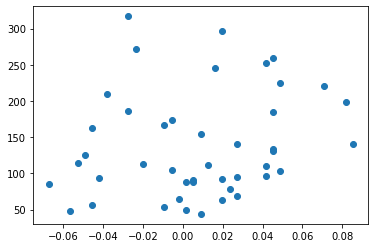

In [22]:
pred = clf.predict(test_x)
plt.scatter(test_x.iloc[:,0],test_y)
clf.score(test_x,test_y)
pred